## 社招-分析2 （薪酬8种排列转为数字）

#### 后面是数据分组和聚合、透视和合并的练习

In [1]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import pandas as pd
import numpy as np

In [8]:
# -*- coding: utf-8 -*-
data=pd.read_csv(r'D:\Crawler\51job\营销-去重换列名.csv', encoding='gb18030')

In [9]:
data=pd.DataFrame(data)

In [10]:
data.shape

(1174, 16)

In [11]:
data.head()

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,Unnamed: 9,规模类型,地区,*n薪,薪酬_n,月薪最小值,月薪最大值
0,营销助理,伯锦船舶科技（上海）有限公司,6千-1万,上海·浦东新区,大专,1年,五险一金\n交通补贴\n通讯补贴\n绩效奖金\n周末双休\nppt\n微信公众号\n视频号\...,学术/科研,NaN,NaN,民营 | 少于50人,NaN,NaN,NaN,NaN,NaN
1,市场营销专员,中国外运长江有限公司,5千-1万,无锡·江阴市,本科,无需经验,NaN,交通/运输/物流,NaN,NaN,国企 | 1000-5000人,NaN,NaN,NaN,NaN,NaN
2,营销策划专员,富民乡村宝贝农业开发有限公司,3.5-4.5千,昆明,大专,2年,NaN,农/林/牧/渔,NaN,NaN,民营 | 50-150人,NaN,NaN,NaN,NaN,NaN
3,营销经理,天诚（中国）科技发展有限公司,1-1.2万,西安·高新技术产业开发区,大专,3-4年,销售管理\n营销策略\n营销策划\n营销宣传\n绩效奖金\n节日福利\n五险\n生日福利,计算机软件,NaN,NaN,民营,NaN,NaN,NaN,NaN,NaN
4,市场渠道营销专员,广东中铭信息科技有限公司,6千-1.2万,湛江·霞山区,大专,无需经验,信用卡\n个贷\n车贷\n房贷\n市场营销\n营销\n拓展专员\n渠道营销\n五险一金\n交...,通信/电信/网络设备,NaN,NaN,民营 | 少于50人,NaN,NaN,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   职位名称        1174 non-null   object 
 1   公司名称        1174 non-null   object 
 2   薪酬          1174 non-null   object 
 3   城市地区        1174 non-null   object 
 4   学历要求        1117 non-null   object 
 5   工作经验要求      1173 non-null   object 
 6   公司福利        1124 non-null   object 
 7   公司标签        1174 non-null   object 
 8   职位描述或任职要求   0 non-null      float64
 9   Unnamed: 9  0 non-null      float64
 10  规模类型        1174 non-null   object 
 11  地区          0 non-null      float64
 12  *n薪         0 non-null      float64
 13  薪酬_n        0 non-null      float64
 14  月薪最小值       0 non-null      float64
 15  月薪最大值       0 non-null      float64
dtypes: float64(7), object(9)
memory usage: 146.9+ KB


In [13]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
print(data.职位名称.value_counts().head(10))
print('-----------------------------------------------------------------------------------')
print(data.公司名称.value_counts().head())

营销总监          65
市场营销专员        54
营销经理          53
市场营销经理        38
营销专员          29
市场/营销/拓展专员    24
主动营销经理-华东区    21
市场营销总监        15
市场营销          14
营销策划          13
Name: 职位名称, dtype: int64
-----------------------------------------------------------------------------------
喜临门家具股份有限公司        27
深圳市乐有家控股集团有限公司     26
航天宏图信息技术股份有限公司     26
郑州市倾程众联网络科技有限公司    15
北京核成科技有限公司         10
Name: 公司名称, dtype: int64


In [14]:
data['工作经验要求'].value_counts()

3-4年     306
2年       234
5-7年     224
1年       198
无需经验     147
8-9年      37
10年以上     26
本科         1
Name: 工作经验要求, dtype: int64

In [15]:
data['学历要求'].value_counts()

大专       607
本科       445
高中        41
中技/中专     14
硕士         8
初中及以下      2
Name: 学历要求, dtype: int64

In [16]:
data['地区']=data['城市地区'].str[:2]

In [17]:
data['地区'].value_counts()

上海    130
广州    109
深圳    108
武汉     67
成都     54
     ... 
银川      1
濮阳      1
新乡      1
亳州      1
宜春      1
Name: 地区, Length: 149, dtype: int64

In [18]:
data['薪酬'].value_counts()

1-1.5万          79
1-2万            66
8千-1.5万         42
6-8千            42
6千-1.2万         37
                ..
5.5-8千·13薪       1
1.4-2.5万·15薪     1
3.5-7千·13薪       1
1.3-1.7万         1
3-4万·13薪         1
Name: 薪酬, Length: 235, dtype: int64

<AxesSubplot: >

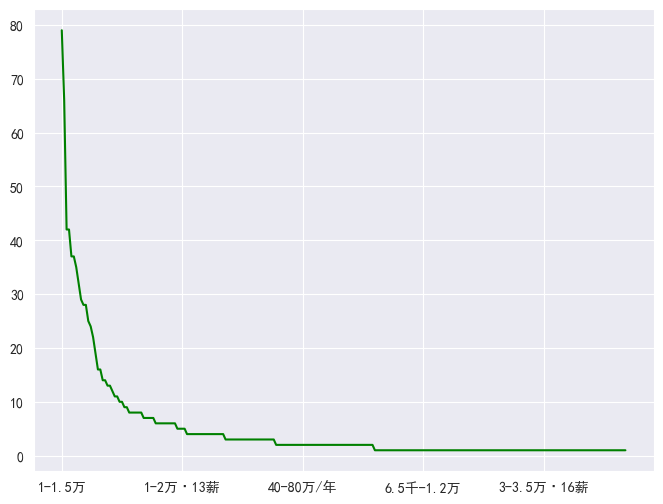

In [19]:
import matplotlib as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
data['薪酬'].value_counts().plot(kind='line', color='green',figsize=(8,6))


In [20]:
data['*n薪']=data['薪酬'].str.extract(('·(\d+)薪'))

In [21]:
data['*n薪'].value_counts().sort_index()

13    116
14     27
15      9
16      9
17      2
Name: *n薪, dtype: int64

In [22]:
data['薪酬'].str.extract(('(.*?年)')).value_counts()

15-20万/年      16
15-30万/年      12
20-30万/年      11
10-20万/年       8
30-60万/年       7
30-40万/年       6
8-10万/年        6
12-20万/年       4
20-40万/年       4
50-100万/年      4
30-50万/年       3
50-60万/年       3
12-18万/年       3
18-25万/年       2
40-60万/年       2
50-80万/年       2
25-30万/年       2
25-40万/年       2
25-50万/年       2
40-80万/年       2
50-55万/年       1
6-10万/年        1
6-12万/年        1
45-60万/年       1
8-16万/年        1
10-12万/年       1
25-35万/年       1
35-40万/年       1
30-45万/年       1
10-13万/年       1
20-38万/年       1
20-35万/年       1
18-35万/年       1
18-23万/年       1
18-20万/年       1
15-25万/年       1
12.5-25万/年     1
10-15万/年       1
80-100万/年      1
dtype: int64

In [23]:
data['最低年薪']=data['薪酬'].str.extract(('^(\d+).*?年'))+'0000'

In [24]:
data['最低年薪'].value_counts()

150000    29
200000    17
300000    17
100000    11
500000    10
120000     8
250000     7
80000      7
180000     5
400000     4
60000      2
800000     1
350000     1
450000     1
Name: 最低年薪, dtype: int64

In [25]:
data['最高年薪']=data['薪酬'].str.extract(('^\d+-(\d+).*?年'))+'0000'

In [26]:
data['最高年薪'].value_counts()

200000     29
300000     25
400000     13
600000     13
100000      7
1000000     5
500000      5
800000      4
180000      3
350000      3
250000      3
120000      2
160000      1
130000      1
150000      1
450000      1
230000      1
550000      1
380000      1
Name: 最高年薪, dtype: int64

1. 月薪 最低最高月薪都没有小数点

In [27]:
data['薪酬'].str.extract(('(^\d-\d万)')).value_counts()

1-2万    73
2-3万    15
3-5万    11
2-4万     8
3-4万     6
4-7万     3
3-6万     2
4-5万     1
4-6万     1
dtype: int64

In [28]:
data['薪酬1']=data['薪酬'].str.extract(('(^\d-\d万)'))
data['薪酬1']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
1169     NaN
1170    1-2万
1171     NaN
1172     NaN
1173    3-4万
Name: 薪酬1, Length: 1174, dtype: object

In [29]:
data['薪酬1']=data['薪酬1'].str.replace('万','0000')
data['薪酬1']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1169        NaN
1170    1-20000
1171        NaN
1172        NaN
1173    3-40000
Name: 薪酬1, Length: 1174, dtype: object

In [30]:
data['薪酬1']=data['薪酬1'].str[0]+'0000'+'-'+data['薪酬1'].str[2:]

In [31]:
data['薪酬1'].value_counts()

10000-20000    73
20000-30000    15
30000-50000    11
20000-40000     8
30000-40000     6
40000-70000     3
30000-60000     2
40000-60000     1
40000-50000     1
Name: 薪酬1, dtype: int64

In [32]:
data['薪酬'].str.extract(('(^\d-\d千)')).value_counts()

6-8千    50
5-8千    31
4-8千    30
4-6千    20
6-9千    15
5-6千    12
5-7千    11
6-7千     8
7-8千     8
7-9千     8
4-5千     7
3-6千     6
4-7千     4
5-9千     4
3-4千     2
8-9千     2
dtype: int64

In [33]:
data['薪酬2']=data['薪酬'].str.extract(('(^\d-\d千)'))
data['薪酬2']=data['薪酬2'].str.replace('千','000')
data['薪酬2']=data['薪酬2'].str[0]+'000'+'-'+data['薪酬2'].str[2:]

In [34]:
data['薪酬2']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1169    NaN
1170    NaN
1171    NaN
1172    NaN
1173    NaN
Name: 薪酬2, Length: 1174, dtype: object

2. 月薪 最低最高月薪都有小数点

In [35]:
data['薪酬'].str.extract(('(^\d.\d-\d.\d[千])')).value_counts()

3.5-4.5千    3
4.5-7.5千    1
4.5-8.5千    1
dtype: int64

In [36]:
data['薪酬11']=data['薪酬'].str.extract(('(^\d.\d-\d.\d[千])'))
data['薪酬11']=data['薪酬11'].str.replace('千','').str.replace('.','')
data['薪酬11']=data['薪酬11'].str[:2]+'00'+'-'+data['薪酬11'].str[3:]+'00'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\712542690.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬11']=data['薪酬11'].str.replace('千','').str.replace('.','')


In [37]:
data['薪酬11']

0             NaN
1             NaN
2       3500-4500
3             NaN
4             NaN
          ...    
1169          NaN
1170          NaN
1171          NaN
1172          NaN
1173          NaN
Name: 薪酬11, Length: 1174, dtype: object

In [38]:
data['薪酬'].str.extract(('(^\d.\d-\d.\d[万])')).value_counts()

1.5-2.5万    22
1.8-2.5万    13
1.2-1.5万     9
1.2-1.8万     5
1.5-1.8万     5
1.2-1.6万     4
1.2-2.4万     3
1.5-2.3万     2
1.2-2.2万     2
1.6-2.5万     2
1.6-2.2万     2
1.1-1.5万     1
1.7-2.2万     1
1.5-2.8万     1
1.4-2.5万     1
1.5-1.9万     1
1.5-1.6万     1
1.1-2.2万     1
1.3-2.6万     1
1.3-2.5万     1
1.3-1.7万     1
1.2-1.4万     1
2.5-2.8万     1
dtype: int64

In [39]:
data['薪酬3']=data['薪酬'].str.extract(('(^\d.\d-\d.\d[万])'))
data['薪酬3']=data['薪酬3'].str.replace('万','').str.replace('.','')
data['薪酬3']=data['薪酬3'].str[:2]+'000'+'-'+data['薪酬3'].str[3:]+'000'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\1293286263.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬3']=data['薪酬3'].str.replace('万','').str.replace('.','')


In [40]:
data['薪酬3']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1169            NaN
1170            NaN
1171    18000-25000
1172            NaN
1173            NaN
Name: 薪酬3, Length: 1174, dtype: object

3. 月薪 最低月薪有小数点最高月薪没有小数点

In [41]:
data['薪酬'].str.extract(('(^\d.\d-\d+[万|千])')).value_counts()

0.8-1万    32
1.5-2万    31
1.5-3万    28
1.2-2万    11
4.5-6千     8
3.5-7千     7
2.5-5万     4
3.5-6千     2
3.5-4万     2
2.5-4万     2
2.5-3万     2
1.8-2万     1
1.6-3万     1
1.6-2万     1
1.4-2万     1
1.3-2万     1
4.5-7千     1
5.5-8千     1
6.4-8千     1
6.5-7千     1
dtype: int64

In [42]:
data['薪酬4']=data['薪酬'].str.extract(('(^\d.\d-\d+[千])'))
data['薪酬4']=data['薪酬4'].str.replace('千','000').str.replace('.','')
data['薪酬4']=data['薪酬4'].str[:2]+'00'+'-'+data['薪酬4'].str[3:]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\1458125990.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬4']=data['薪酬4'].str.replace('千','000').str.replace('.','')


In [43]:
data['薪酬4'].value_counts()

4500-6000    8
3500-7000    7
3500-6000    2
6400-8000    1
5500-8000    1
6500-7000    1
4500-7000    1
Name: 薪酬4, dtype: int64

In [44]:
data['薪酬9']=data['薪酬'].str.extract(('(^\d.\d-\d+[万])'))
data['薪酬9']=data['薪酬9'].str.replace('万','0000').str.replace('.','')
data['薪酬9']=data['薪酬9'].str[:2]+'000'+'-'+data['薪酬9'].str[3:]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\337341264.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬9']=data['薪酬9'].str.replace('万','0000').str.replace('.','')


In [45]:
data['薪酬9'].value_counts()

08000-10000    32
15000-20000    31
15000-30000    28
12000-20000    11
25000-50000     4
25000-30000     2
25000-40000     2
35000-40000     2
18000-20000     1
16000-30000     1
14000-20000     1
16000-20000     1
13000-20000     1
Name: 薪酬9, dtype: int64

4. 月薪 最低月薪没有小数点最高月薪有小数点

In [46]:
data['薪酬'].str.extract(('(^\d+-\d.\d[万|千])')).value_counts()

1-1.5万     86
1-1.2万     10
1-1.6万     10
2-2.5万     10
2-3.5万      6
1-1.8万      5
3-3.5万      4
50-100万     4
6-7.5千      3
1-1.4万      2
1-1.3万      2
5-8.5千      1
8-8.5千      1
6-6.5千      1
3-3.3万      1
5-5.5千      1
3-4.5千      1
2-2.8万      1
2-2.7万      1
80-100万     1
dtype: int64

In [47]:
data['薪酬5']=data['薪酬'].str.extract(('(^\d+-\d.\d[千])'))
data['薪酬5']=data['薪酬5'].str.replace('千','00').str.replace('.','')
data['薪酬5']=data['薪酬5'].str[0]+'000'+'-'+data['薪酬5'].str[2:]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\981881271.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬5']=data['薪酬5'].str.replace('千','00').str.replace('.','')


In [48]:
data['薪酬5'].value_counts()

6000-7500    3
8000-8500    1
6000-6500    1
5000-5500    1
5000-8500    1
3000-4500    1
Name: 薪酬5, dtype: int64

In [49]:
data['薪酬'].str.extract(('(^\d+-\d.\d[万])')).value_counts()
data['薪酬10'] = data['薪酬'].str.extract(('(^\d+-\d.\d[万])'))
data['薪酬10'] = data['薪酬10'].str.replace('万', '000').str.replace('.', '')
data['薪酬10'] = data['薪酬10'].str[0] + '0000' + '-' + data['薪酬10'].str[2:]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\4087412332.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬10'] = data['薪酬10'].str.replace('万', '000').str.replace('.', '')


In [50]:
data['薪酬10'].value_counts()

10000-15000      86
10000-12000      10
10000-16000      10
20000-25000      10
20000-35000       6
10000-18000       5
30000-35000       4
50000--100000     4
10000-14000       2
10000-13000       2
20000-28000       1
80000--100000     1
20000-27000       1
30000-33000       1
Name: 薪酬10, dtype: int64

5. 最低最高月薪都带单位
月薪 最低最高月薪都没有小数点

In [51]:
data['薪酬'].str.extract(('(^\d[千]-\d[千])')).value_counts()

Series([], dtype: int64)

In [52]:
data['薪酬'].str.extract(('(^\d[万]-\d[万])')).value_counts()

Series([], dtype: int64)

In [53]:
data['薪酬'].str.extract(('(^\d[万|千]-\d[万|千])')).value_counts()

5千-1万    41
6千-1万    32
8千-1万    27
7千-1万    17
9千-1万     1
dtype: int64

In [54]:
data['薪酬6']=data['薪酬'].str.extract(('(^\d[万|千]-\d[万|千])'))
data['薪酬6']=data['薪酬6'].str.replace('万','0000').str.replace('千','000')

In [55]:
data['薪酬6']

0       6000-10000
1       5000-10000
2              NaN
3              NaN
4              NaN
           ...    
1169           NaN
1170           NaN
1171           NaN
1172           NaN
1173           NaN
Name: 薪酬6, Length: 1174, dtype: object

6. 月薪 最低最高月薪都有小数点(没有这种情况)

In [56]:
data['薪酬'].str.extract(('(^\d.\d[万|千]-\d.\d[万|千])')).value_counts()

7.5千-1.3万    3
7.5千-1.5万    3
6.5千-1.2万    1
7.5千-1.2万    1
8.3千-1.3万    1
8.5千-1.1万    1
8.5千-1.5万    1
dtype: int64

In [57]:
data['薪酬7']=data['薪酬'].str.extract(('(^\d.\d[万|千]-\d.\d[万|千])'))
data['薪酬7']=data['薪酬7'].str.replace('万','000').str.replace('.','')
data['薪酬7']=data['薪酬7'].str.replace('千','00').str.replace('.','')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\1918584178.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬7']=data['薪酬7'].str.replace('万','000').str.replace('.','')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\1918584178.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬7']=data['薪酬7'].str.replace('千','00').str.replace('.','')


In [58]:
data['薪酬7'].value_counts()

7500-13000    3
7500-15000    3
8500-11000    1
8500-15000    1
7500-12000    1
8300-13000    1
6500-12000    1
Name: 薪酬7, dtype: int64

7. 月薪 最低月薪有小数点最高月薪没有小数点

In [59]:
data['薪酬'].str.extract(('(^\d.\d[万|千]-\d+[万|千])')).value_counts()

5.5千-1万    1
dtype: int64

In [60]:
data['薪酬12']=data['薪酬'].str.extract(('(^\d.\d[万|千]-\d+[万|千])'))
data['薪酬12']=data['薪酬12'].str.replace('万','0000')
data['薪酬12']=data['薪酬12'].str.replace('千','00').str.replace('.','')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\2551071522.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬12']=data['薪酬12'].str.replace('千','00').str.replace('.','')


In [61]:
data['薪酬12']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1169    NaN
1170    NaN
1171    NaN
1172    NaN
1173    NaN
Name: 薪酬12, Length: 1174, dtype: object

8. 月薪 最低月薪有小数点最高月薪没有小数点

In [62]:
data['薪酬'].str.extract(('(^\d+[万|千]-\d.\d[万|千])')).value_counts()

8千-1.5万    59
8千-1.2万    42
6千-1.2万    41
8千-1.6万    17
7千-1.4万    10
7千-1.2万     7
9千-1.5万     6
9千-1.2万     6
7千-1.3万     5
6千-1.1万     4
8千-1.3万     4
9千-1.6万     3
8千-1.1万     2
9千-1.3万     2
9千-1.4万     2
9千-1.8万     2
7千-1.1万     1
dtype: int64

In [63]:
data['薪酬8']=data['薪酬'].str.extract(('(^\d+[万|千]-\d.\d[万|千])'))
data['薪酬8']=data['薪酬8'].str.replace('万','000').str.replace('千','000').str.replace('.','')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19188\1762529826.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['薪酬8']=data['薪酬8'].str.replace('万','000').str.replace('千','000').str.replace('.','')


In [64]:
data['薪酬8'].value_counts()

8000-15000    59
8000-12000    42
6000-12000    41
8000-16000    17
7000-14000    10
7000-12000     7
9000-12000     6
9000-15000     6
7000-13000     5
6000-11000     4
8000-13000     4
9000-16000     3
8000-11000     2
9000-13000     2
9000-14000     2
9000-18000     2
7000-11000     1
Name: 薪酬8, dtype: int64

In [65]:
data['薪酬_n']=data['薪酬1'].combine_first(data['薪酬2']).combine_first(data['薪酬3']).combine_first(data['薪酬4']).combine_first(data['薪酬5']).combine_first(data['薪酬6']).combine_first(data['薪酬7']).combine_first(data['薪酬8']).combine_first(data['薪酬9']).combine_first(data['薪酬10']).combine_first(data['薪酬11']).combine_first(data['薪酬12'])

In [66]:
data['薪酬_n']=data['薪酬_n'].astype('str')

In [67]:
# data['月薪最小值']=data['薪酬'].str.findall('(.*?)-').astype('str')
data['月薪最小值']=data['薪酬_n'].str.findall('(.*?)-').astype('str').str[2:-2]

In [68]:
data['月薪最大值']=data['薪酬_n'].str.findall('-(\d+)').astype('str').str[2:-2]

In [69]:
data1=data.drop(['薪酬1', '薪酬2', '薪酬3', '薪酬4','薪酬5','薪酬6','薪酬7','薪酬8','薪酬9','薪酬10','薪酬11','薪酬12'],axis=1)

In [70]:
data1.head()

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,Unnamed: 9,规模类型,地区,*n薪,薪酬_n,月薪最小值,月薪最大值,最低年薪,最高年薪
0,营销助理,伯锦船舶科技（上海）有限公司,6千-1万,上海·浦东新区,大专,1年,五险一金\n交通补贴\n通讯补贴\n绩效奖金\n周末双休\nppt\n微信公众号\n视频号\...,学术/科研,NaN,NaN,民营 | 少于50人,上海,NaN,6000-10000,6000,10000,NaN,NaN
1,市场营销专员,中国外运长江有限公司,5千-1万,无锡·江阴市,本科,无需经验,NaN,交通/运输/物流,NaN,NaN,国企 | 1000-5000人,无锡,NaN,5000-10000,5000,10000,NaN,NaN
2,营销策划专员,富民乡村宝贝农业开发有限公司,3.5-4.5千,昆明,大专,2年,NaN,农/林/牧/渔,NaN,NaN,民营 | 50-150人,昆明,NaN,3500-4500,3500,4500,NaN,NaN
3,营销经理,天诚（中国）科技发展有限公司,1-1.2万,西安·高新技术产业开发区,大专,3-4年,销售管理\n营销策略\n营销策划\n营销宣传\n绩效奖金\n节日福利\n五险\n生日福利,计算机软件,NaN,NaN,民营,西安,NaN,10000-12000,10000,12000,NaN,NaN
4,市场渠道营销专员,广东中铭信息科技有限公司,6千-1.2万,湛江·霞山区,大专,无需经验,信用卡\n个贷\n车贷\n房贷\n市场营销\n营销\n拓展专员\n渠道营销\n五险一金\n交...,通信/电信/网络设备,NaN,NaN,民营 | 少于50人,湛江,NaN,6000-12000,6000,12000,NaN,NaN


In [71]:
fd = pd.DataFrame(data1)
fd.to_csv('营销-1-clean.csv',header = True,index=0)

In [156]:
data2 = data1[['月薪最小值', '月薪最大值','工作经验要求']]
data2.dropna(how='any', inplace=True)
data2.replace('None',np.NaN)  # 2种方法都没有用，不是空值
data2
# data2.iloc[2,:]
# data2.isnull().sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19648\2111348984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(how='any', inplace=True)


,月薪最小值,月薪最大值,工作经验要求
0,6000,8000,2年经验
1,,,2年经验
4,13000,17000,5-7年经验
5,15000,16000,5-7年经验
6,,,5-7年经验
...,...,...,...
1549,,,10年以上经验
1550,,,5-7年经验
1551,,,3-4年经验
1552,,,3-4年经验


In [64]:
# for i in data2['月薪最小值']:
#     if len(i)<4:
#         print(i.index)

#
# for j in data2['月薪最大值']:
#     j.strip()
#     j.strip("\n")
#     j.strip("\t")
#     j.strip("\"")
#     j = [float(x) for x in j]


In [65]:
data2.drop(index=1, axis=0, inplace=True)
data2.drop(index=6, axis=0, inplace=True)
data2.drop(index=25, axis=0, inplace=True)
data2.drop(index=29, axis=0, inplace=True)
data2.drop(index=48, axis=0, inplace=True)
data2.drop(index=67, axis=0, inplace=True)
data2.drop(index=74, axis=0, inplace=True)
data2.drop(index=85, axis=0, inplace=True)
data2.drop(index=86, axis=0, inplace=True)
data2.drop(index=95, axis=0, inplace=True)
data2.drop(index=98, axis=0, inplace=True)
data2.drop(index=488, axis=0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19648\2099506960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(index=74, axis=0, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19648\2099506960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(index=85, axis=0, inplace=True)


KeyError: '[92] not found in axis'

In [55]:
data2.drop(index=43, axis=0, inplace=True)
data2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4572\1796989315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(index=43, axis=0, inplace=True)


,月薪最小值,月薪最大值,工作经验要求
0,8000,12000,3-4年经验
1,18000,25000,3-4年经验
2,15000,20000,5-7年经验
4,15000,22000,5-7年经验
6,10000,20000,3-4年经验
...,...,...,...
489,8000,16000,5-7年经验
491,10000,15000,2年经验
494,25000,30000,5-7年经验
495,13000,17000,1年经验


In [56]:
# data2['月薪最小值']
# for i in data2['月薪最小值']:
#     i = float(i)
#     print(i)
#     # print(type(i))

for循环没有改变总体dtype值

把不是空值的空白值手动去除后用astype

In [57]:
data2['月薪最小值']=data2['月薪最小值'].astype('int')
data2['月薪最大值']=data2['月薪最大值'].astype('int')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4572\3137457581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['月薪最小值']=data2['月薪最小值'].astype('int')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4572\3137457581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['月薪最大值']=data2['月薪最大值'].astype('int')


In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 497
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   月薪最小值   383 non-null    int32 
 1   月薪最大值   383 non-null    int32 
 2   工作经验要求  383 non-null    object
dtypes: int32(2), object(1)
memory usage: 9.0+ KB


In [59]:
a = data2.groupby('工作经验要求')['月薪最小值'].mean()
a = round(a, 2)
a

工作经验要求
1年经验      12166.67
2年经验      12133.33
3-4年经验    13479.53
5-7年经验    12626.76
8-9年经验    15750.00
无需经验      12125.00
Name: 月薪最小值, dtype: float64

In [60]:
b = data2.groupby('工作经验要求')['月薪最大值'].mean()
b = round(b, 2)
b

工作经验要求
1年经验      19888.89
2年经验      19600.00
3-4年经验    21368.42
5-7年经验    20309.86
8-9年经验    27000.00
无需经验      18625.00
Name: 月薪最大值, dtype: float64

In [61]:
经验1年 = list(data2[data2['工作经验要求']=='1年经验']['月薪最小值'])
经验2年 = data2[data2['工作经验要求']=='2年经验']['月薪最小值']
经验3到4年 = data2[data2['工作经验要求']=='3-4年经验']['月薪最小值']
经验5到7年 = data2[data2['工作经验要求']=='5-7年经验']['月薪最小值']
经验8到9年 = data2[data2['工作经验要求']=='8-9年经验']['月薪最小值']
无需经验 = data2[data2['工作经验要求']=='无需经验']['月薪最小值']

In [62]:
type(经验1年)
经验1年

[8000,
 15000,
 15000,
 6000,
 8000,
 6000,
 8000,
 15000,
 9000,
 8000,
 10000,
 7000,
 10000,
 15000,
 13000,
 15000,
 18000,
 18000,
 13000,
 30000,
 15000,
 8000,
 10000,
 15000,
 13000,
 15000,
 12000,
 9000,
 4000,
 15000,
 10000,
 13000,
 15000,
 8000,
 12000,
 25000,
 7000,
 10000,
 15000,
 8000,
 15000,
 12000,
 15000,
 15000,
 10000,
 12000,
 5000,
 10000,
 16000,
 8000,
 10000,
 15000,
 15000,
 13000]

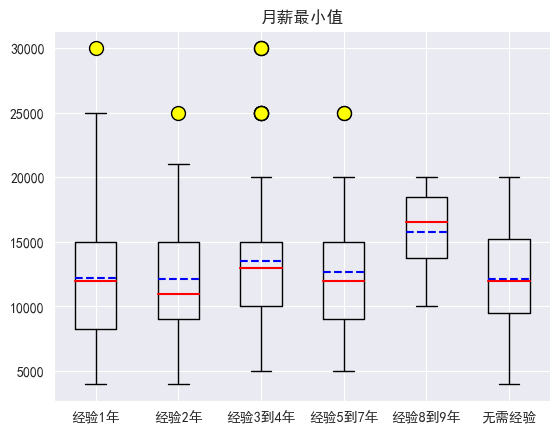

In [63]:
import matplotlib.pyplot as plt
plt.boxplot((经验1年,
经验2年,
经验3到4年,
经验5到7年,
经验8到9年,
无需经验
             ),labels=(
    '经验1年',
    '经验2年',
    '经验3到4年',
    '经验5到7年',
    '经验8到9年',
    '无需经验',
),
    medianprops={'color': 'red', 'linewidth': '1.5'},
    meanline=True,
    showmeans=True,
    meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    flierprops={"marker": "o", "markerfacecolor": "yellow", "markersize": 10},
            )
plt.title('月薪最小值')
plt.grid(visible=True)
plt.show()

In [64]:
z = data.groupby('工作经验要求')['月薪最小值']
z.head()

0       8000
1      18000
2      15000
4      15000
6      10000
7      20000
8      15000
9      15000
10      8000
13     18000
14     12000
16     15000
17     10000
22      7000
46     15000
60      6000
68     20000
71      8000
78     10000
82      6000
164    12000
224     8000
316    15000
372    20000
385    10000
425    16000
429    10000
436    15000
475    18000
Name: 月薪最小值, dtype: object

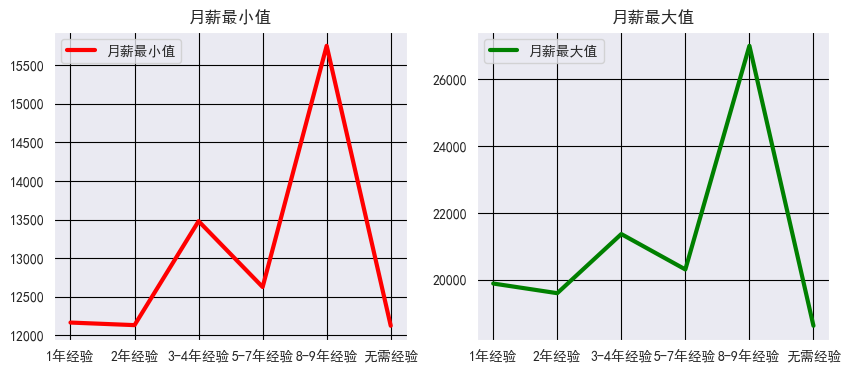

In [68]:
import matplotlib.pyplot as plt
import numpy as np

#通过对象绘图
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
x=a.index

#绘制第一幅图
Y1=a
ax1.plot(x,Y1,label='月薪最小值', color='r',linewidth=3)
ax1.legend(loc="best")
ax1.grid(color='k')
ax1.set_title("月薪最小值")

#绘制第二幅图
Y2=b
ax2.plot(x,Y2,label='月薪最大值', color='green',linewidth=3)
ax2.legend(loc="best")
ax2.set_title("月薪最大值")
# ax2.set_xlabel("X")
# ax2.set_ylabel("Y")
ax2.grid(color='k')

plt.show()

In [69]:
a = data2.groupby('工作经验要求')['月薪最小值'].max()
round(a, 2)

工作经验要求
1年经验      30000
2年经验      25000
3-4年经验    30000
5-7年经验    25000
8-9年经验    20000
无需经验      20000
Name: 月薪最小值, dtype: int32

In [70]:
b = data2.groupby('工作经验要求')['月薪最大值'].max()
round(b, 2)

工作经验要求
1年经验      50000
2年经验      40000
3-4年经验    60000
5-7年经验    40000
8-9年经验    30000
无需经验      35000
Name: 月薪最大值, dtype: int32

In [71]:
c = data1.groupby(["地区","月薪最小值"]).groups
c = data1.groupby(["地区","月薪最小值"]).get_group(('成都', '15000'))

In [72]:
e = data1['规模类型'].str[-12:]
e

0        |  50-150人
1       |  150-500人
2       |  150-500人
4        1000-5000人
6      民营  |  少于50人
           ...     
489      1000-5000人
491      |  50-150人
494      1000-5000人
495     5000-10000人
497      |  50-150人
Name: 规模类型, Length: 396, dtype: object

In [73]:
公司规模 = []
for i in e:
    i = i.strip()
    i = i.strip('|')
    i = i.strip()
    i = i.strip('民营')
    i = i.strip('美）')
    i = i.strip('国企')
    i = i.strip('公司')
    i = i.strip('外资（欧美）')
    i = i.strip('合资')
    i = i.strip()
    i = i.strip('|')
    i = i.strip()
    print(i)
    公司规模.append(i)
    # print(公司类型)

50-150人
150-500人
150-500人
1000-5000人
少于50人
500-1000人
1000-5000人
少于50人
少于50人
10000人以上
1000-5000人
5000-10000人
150-500人
10000人以上
1000-5000人
50-150人
150-500人
150-500人
1000-5000人
1000-5000人
150-500人
1000-5000人
1000-5000人
50-150人
少于50人
50-150人
1000-5000人
10000人以上
1000-5000人
150-500人
少于50人
1000-5000人
50-150人
少于50人
少于50人

150-500人
1000-5000人
50-150人
150-500人
1000-5000人
150-500人
少于50人
150-500人
500-1000人
50-150人
少于50人
5000-10000人
50-150人
500-1000人
150-500人
500-1000人
500-1000人
50-150人
150-500人
50-150人
50-150人
50-150人
50-150人
150-500人
少于50人
150-500人
150-500人
少于50人
150-500人
5000-10000人
50-150人
150-500人
50-150人
150-500人
少于50人
150-500人

少于50人
50-150人
1000-5000人
少于50人
150-500人
10000人以上
50-150人
150-500人
50-150人
1000-5000人
5000-10000人
50-150人
150-500人
50-150人

150-500人
50-150人
少于50人
500-1000人
150-500人
500-1000人
1000-5000人
50-150人
150-500人
150-500人
50-150人
150-500人
10000人以上
50-150人
5000-10000人

500-1000人
150-500人
1000-5000人
150-500人
500-1000人
1000-5000人
150-500人
1000-5000人
少于50人
50-150人
少于50人
5000-10000人

In [74]:
公司规模 = pd.DataFrame(公司规模)
data1['公司规模'] = 公司规模

In [75]:
d = data1['规模类型'].str[:7]
d

0      民营  |  
1      民营  |  
2      民营  |  
4      民营  |  
6      民营  |  
        ...   
489    民营  |  
491    民营  |  
494    民营  |  
495    民营  |  
497    民营  |  
Name: 规模类型, Length: 396, dtype: object

In [76]:
公司类型 = []
for i in d:
    i = i.strip()
    i = i.strip('|')
    i = i.strip()
    print(i)
    公司类型.append(i)
    # print(公司类型)

民营
民营
民营
民营
民营
合资
民营
民营
民营
已上市
民营
已上市
民营
已上市
民营
民营
民营
民营
民营
民营
国企
国企
民营
民营
民营
民营
民营
已上市
民营
民营
民营
民营
民营
民营
民营
民营
外资（非欧美）
已上市
民营
已上市
已上市
民营
民营
民营
已上市
民营
民营
已上市
民营
民营
已上市
外资（非欧美）
民营
民营
合资
民营
民营
已上市
民营
民营
民营
民营
民营
民营
合资
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
外资（非欧美）
民营
民营
已上市
民营
民营
民营
外资（欧美）
已上市
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
已上市
合资
民营
民营
已上市
民营
外资（欧美）
民营
民营
民营
创业公司
民营
民营
创业公司
民营
已上市
民营
民营
民营
民营
已上市
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
外资（非欧美）
民营
民营
创业公司
外资（非欧美）
民营
民营
创业公司
民营
已上市
民营
民营
民营
民营
民营
外资（非欧美）
民营
民营
民营
国企
民营
已上市
民营
民营
民营
民营
民营
民营
已上市
外资（欧美）
民营
民营
外资（欧美）
民营
国企
民营
民营
民营
民营
民营
已上市
民营
民营
已上市
已上市
民营
民营
民营
外资（欧美）
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
已上市
民营
民营
民营
已上市
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
国企
合资
民营
外资（欧美）
已上市
民营
国企
民营
已上市
民营
民营
民营
民营
民营
民营
民营
民营
已上市
民营
民营
民营
民营
民营
民营
民营
民营
合资
合资
民营
合资
创业公司
民营
民营
民营
民营
外资（欧美）
民营
民营
民营
民营
民营
合资
创业公司
民营
民营
国企
民营
民营
民营
已上市
民营
民营
国企
外资（非欧美）
民营
已上市
民营
已上市
民营
民营
民营
民营
民营
外资（非欧美）
民营
民营
合资
民营
民营
民营
民营
民营
民营
民营
民营
民营
国企
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
民营
1000

In [77]:
公司类型 = pd.DataFrame(公司类型)

In [78]:
data1['公司类型'] = 公司类型

In [79]:
f = data1['发布时间'].str[0:5]
f

0      01-17
1      01-29
2      01-18
4      01-14
6      01-10
       ...  
489    12-08
491    12-09
494    12-07
495    12-08
497    12-07
Name: 发布时间, Length: 396, dtype: object

In [80]:
发布时间 = []
for i in f:
    i = i.strip('发布')
    print(i)
    发布时间.append(i)
    # print(公司类型)
发布时间 = pd.DataFrame(发布时间)
data1['发布时间'] = 发布时间

01-17
01-29
01-18
01-14
01-10
01-10
01-14
01-03
12-31
12-28
12-26
01-29
01-29
01-28
01-28
01-28
01-28
01-28
12-16
01-29
01-29
01-29
01-28
01-28
01-28
01-28
01-28
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-29
01-17
01-16
01-18
01-29
01-17
01-18
01-16
01-14
01-10
01-10
01-14
12-28
01-29
01-28
01-28
01-28
01-28
01-28
01-29
12-16
01-28
01-28
01-28
01-29
01-28
01-29
01-29
01-29
01-28
01-27
01-27
01-28
01-28
01-28
01-27
01-26
01-29
01-29
01-29
01-25
01-29
01-29
01-27
01-29
01-29
01-29
01-28
01-29
01-29
01-29
01-28
01-28
01-28
01-29
01-29
01-29
01-29
01-29
01-28
12-13
01-28
01-28
01-28
01-28
01-29
01-29
01-29
01-28
01-28
01-28
01-28
01-28
01-28
01-21
01-28
01-28
01-28
01-28
01-20
01-26
01-20
01-17
01-20
01-21
01-22
01-20
01-16
01-16
01-16
01-21
01-21
01-21
01-16
01-21
01-1

In [81]:
data1.head()

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,发布时间,公司标签,职位描述或任职要求,规模类型,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值,公司规模,公司类型
0,安卓工程师（双休 13薪）,常州市荣瑞信息自动化有限公司,8千-1.2万,常州-钟楼区,本科,3-4年经验,01-17,计算机软件,职位描述及要求:岗位职责：1、负责Android平台客户端产品开发和维护工作，并负责在实际开...,民营 | 50-150人,常州,NaN,NaN,NaN,8000-12000,8000,12000,50-150人,民营
1,安卓工程师,苏州咖乐美咖啡机科技有限公司,1.8-2.5万·14薪,苏州-工业园区,本科,3-4年经验,01-29,家具/家电/玩具/礼品,职责描述：1、根据需求设计功能模块的技术方案；2、独立进行功能模块的开发编码与调试；3、负责...,民营 | 150-500人,苏州,14,NaN,NaN,18000-25000,18000,25000,150-500人,民营
2,高级安卓开发工程师,广州优谷信息技术有限公司,1.5-2万·13薪,广州-天河区,大专,5-7年经验,01-18,计算机软件,岗位职责1、负责公司核心产品，朗读亭、朗读教室、留声墙等产品的编码开发；2、对负责的编码和已...,民营 | 150-500人,广州,13,NaN,NaN,15000-20000,15000,20000,150-500人,民营
4,安卓APP开发工程师,上海芮想信息科技有限公司,1.5-2.2万,长沙,大专,5-7年经验,01-10,计算机软件,任职要求：1、大专及以上学历2、5年以上安卓原生开发经验3、熟悉java开发语言，熟悉kot...,民营 | 1000-5000人,长沙,NaN,NaN,NaN,15000-22000,15000,22000,少于50人,民营
6,Android安卓应用高级开发工程师,深圳市微队信息技术有限公司,1-2万,昆山,本科,3-4年经验,01-14,计算机软件,1、负责参与机器人项目的前期策划和目标制定并提供可行性建议；2、负责根据项目的要求，承担An...,民营 | 少于50人,昆山,NaN,NaN,NaN,10000-20000,10000,20000,1000-5000人,民营


In [82]:
pd.DataFrame(data1.groupby('地区')['公司规模'].value_counts()).rename_axis(["行政区", "companysize"])

公司规模
行政区 companysize      
上海  50-150人        12
    1000-5000人      5
    150-500人        5
    500-1000人       5
    少于50人           4
...               ...
长沙                  1
    500-1000人       1
青岛  1000-5000人      1
    150-500人        1
    500-1000人       1

[117 rows x 1 columns]

In [83]:
data1['发布时间'] = pd.to_datetime(data1['发布时间'], format="%m-%d")
data1['发布时间'].apply(lambda x:x.day)
data1['发布时间'].apply(lambda x:x.month)

0      1.0
1      1.0
2      1.0
4      1.0
6      1.0
      ... 
489    NaN
491    NaN
494    NaN
495    NaN
497    NaN
Name: 发布时间, Length: 396, dtype: float64

In [84]:
pd.DataFrame(data1.groupby([data1.发布时间.apply(lambda x:x.day)])['地区'].value_counts()).rename_axis(["发布日", "行政区"])

地区
发布日  行政区    
1.0  厦门    1
     广州    1
     武汉    1
2.0  武汉    1
     深圳    1
...       ..
29.0 惠州    1
     武汉    1
31.0 上海    1
     佛山    1
     深圳    1

[176 rows x 1 columns]

In [85]:
data1.groupby('工作经验要求')['月薪最小值'].value_counts()

工作经验要求  月薪最小值
1年经验    15000    16
        10000     8
        8000      8
        13000     5
        12000     4
                 ..
无需经验    15000     1
        16000     1
        20000     1
        4000      1
        8000      1
Name: 月薪最小值, Length: 75, dtype: int64

In [86]:
data1.groupby("地区", sort=False)["公司名称"].apply(lambda x: x.str.contains("信息科技").sum())

地区
常州     0
苏州     0
广州     1
长沙     2
昆山     0
深圳    10
杭州     1
宁波     0
扬州     2
佛山     2
成都     1
上海     2
重庆     2
大连     0
武汉     0
惠州     0
济南     0
南通     0
东莞     0
北京     0
常熟     0
南京     1
青岛     0
合肥     0
中山     1
宜宾     0
长春     0
厦门     0
桂林     0
昆明     0
南宁     0
福州     0
天津     0
珠海     0
无锡     0
延吉     0
芜湖     0
西安     0
海口     0
Name: 公司名称, dtype: int64

In [87]:
data1[data1['公司名称'].str.contains("信息技术")]

,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,发布时间,公司标签,职位描述或任职要求,规模类型,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值,公司规模,公司类型
2,高级安卓开发工程师,广州优谷信息技术有限公司,1.5-2万·13薪,广州-天河区,大专,5-7年经验,1900-01-18,计算机软件,岗位职责1、负责公司核心产品，朗读亭、朗读教室、留声墙等产品的编码开发；2、对负责的编码和已...,民营 | 150-500人,广州,13,NaN,NaN,15000-20000,15000,20000,150-500人,民营
6,Android安卓应用高级开发工程师,深圳市微队信息技术有限公司,1-2万,昆山,本科,3-4年经验,1900-01-14,计算机软件,1、负责参与机器人项目的前期策划和目标制定并提供可行性建议；2、负责根据项目的要求，承担An...,民营 | 少于50人,昆山,NaN,NaN,NaN,10000-20000,10000,20000,1000-5000人,民营
23,安卓开发工程师(J10686),中移（杭州）信息技术有限公司,2-4万·16薪,长沙,本科,3-4年经验,1900-01-28,互联网/电子商务,1.负责Android平台底层开发和驱动移植调试工作，与硬件工程师沟通合作，解决项目研发和量...,国企 | 1000-5000人,长沙,16,NaN,NaN,20000-40000,20000,40000,50-150人,民营
54,Android安卓工程师,滨江兄弟信息技术（杭州）有限公司,7.5千-1.2万·14薪,长沙,大专,5-7年经验,1900-01-29,计算机软件,任职要求：1、大专及以上学历2、5年以上安卓原生开发经验3、熟悉java开发语言，熟悉kot...,外资（非欧美） | 150-500人,长沙,14,NaN,NaN,7500-12000,7500,12000,150-500人,合资
78,安卓研发工程师,江苏敏行信息技术有限公司,1-2万·13薪,武汉-汉阳区,本科,2年经验,1900-01-16,计算机软件,简介：4个月短期项目，4个月短期项目，4个月短期项目！！签署兼职协议，薪资范围：18k-22...,民营 | 50-150人,武汉,13,NaN,NaN,10000-20000,10000,20000,10000人以上,已上市
84,安卓软件开发工程师（国内/欧美/对日）,大连隆基信息技术有限公司,8千-1.5万,长沙,大专,5-7年经验,1900-01-29,计算机软件,任职要求：1、大专及以上学历2、5年以上安卓原生开发经验3、熟悉java开发语言，熟悉kot...,民营 | 150-500人,长沙,NaN,NaN,NaN,8000-15000,8000,15000,50-150人,民营
97,安卓/Android软件开发工程师,青岛腾创信息技术有限公司,6-9千,深圳-南山区,本科,1年经验,1900-01-29,电子技术/半导体/集成电路,1、负责公司业务所需的Android的设计和开发；2、参与项目需求分析、产品模块的概要和详细...,民营,深圳,NaN,NaN,NaN,6000-9000,6000,9000,150-500人,合资
117,安卓/Android软件开发工程师,青岛腾创信息技术有限公司,6-9千,上海-浦东新区,大专,3-4年经验,1900-01-29,电子技术/半导体/集成电路,岗位职责：1、你将协助完成公司Android客户端的开发，部分参与架构设计及优化、需求分析，...,民营,上海,NaN,NaN,NaN,6000-9000,6000,9000,50-150人,民营
119,安卓应用开发工程师(J15512),上海云角信息技术有限公司,1.6-2万,常熟,本科,5-7年经验,1900-01-29,计算机软件,工作内容：1、负责投影仪平台自动聚焦，梯形校正（主要是安华和歌尔等厂家算法）feature；...,民营 | 50-150人,常熟,NaN,NaN,NaN,16000-20000,16000,20000,少于50人,民营
144,安卓系统工程师（佛山桂城上班，提供住宿）,广东天波信息技术股份有限公司,1-2万,深圳-宝安区,大专,1年经验,1900-01-28,电子技术/半导体/集成电路,岗位职责：1.对产品进行用例设计.系统测试，完成产品的质量保证和发布；2.根据项目要求制定性...,民营 | 500-1000人,深圳,NaN,NaN,NaN,10000-20000,10000,20000,50-150人,民营


In [88]:
data2.set_index("工作经验要求").groupby(len)['月薪最小值'].mean()

工作经验要求
4    12145.985401
6    13270.325203
Name: 月薪最小值, dtype: float64

In [89]:
data1.groupby({'地区':'district','月薪最小值':'最小值','月薪最大值':'最大值'}, axis=1).sum()

,district,最大值,最小值
0,常州,12000,8000
1,苏州,25000,18000
2,广州,20000,15000
4,长沙,22000,15000
6,昆山,20000,10000
...,...,...,...
489,上海,16000,8000
491,杭州,15000,10000
494,西安,30000,25000
495,深圳,17000,13000


In [90]:
data2['地区'] = data1['地区']
data2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4572\249347651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['地区'] = data1['地区']


,月薪最小值,月薪最大值,工作经验要求,地区
0,8000,12000,3-4年经验,常州
1,18000,25000,3-4年经验,苏州
2,15000,20000,5-7年经验,广州
4,15000,22000,5-7年经验,长沙
6,10000,20000,3-4年经验,昆山
...,...,...,...,...
489,8000,16000,5-7年经验,上海
491,10000,15000,2年经验,杭州
494,25000,30000,5-7年经验,西安
495,13000,17000,1年经验,深圳


In [91]:
y = data2.groupby('地区')['月薪最小值'].mean()
y

地区
上海    12666.666667
东莞    15250.000000
中山    10000.000000
佛山    12000.000000
北京    12000.000000
南京    13684.210526
南宁    13500.000000
南通    11500.000000
厦门    15285.714286
合肥    14571.428571
大连     9800.000000
天津    17500.000000
宁波    18000.000000
宜宾     6000.000000
常州     9666.666667
常熟    16000.000000
广州    11468.750000
延吉    13000.000000
惠州    15000.000000
成都    15714.285714
扬州    15666.666667
无锡    15000.000000
昆山     9500.000000
昆明    15000.000000
杭州    13846.153846
桂林    13000.000000
武汉    13588.235294
济南    12500.000000
海口    15000.000000
深圳    12634.615385
珠海    11500.000000
福州    10000.000000
芜湖    16000.000000
苏州    11272.727273
西安    17500.000000
重庆    13900.000000
长春    12000.000000
长沙    12150.000000
青岛     9666.666667
Name: 月薪最小值, dtype: float64

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

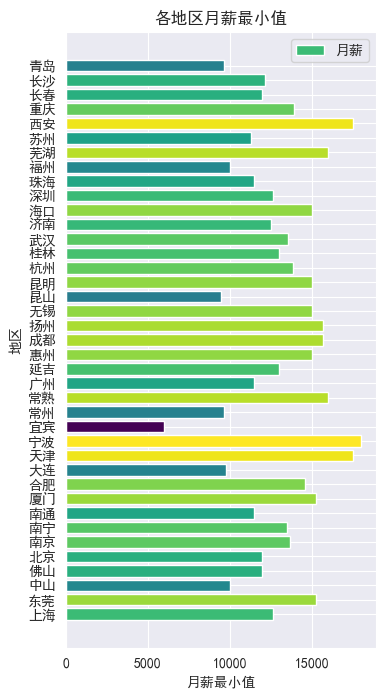

In [92]:
from matplotlib import colors
import matplotlib.cm as cm

norm1 = colors.LogNorm()
fig = plt.figure(figsize = (4,8))
plt.barh(y.index, y, label='月薪', color=cm.ScalarMappable(norm1, 'viridis').to_rgba(y))
plt.legend()
plt.title("各地区月薪最小值")
plt.xlabel("月薪最小值")
plt.ylabel("地区")
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=y.min(), vmax=y.max()))
plt.colorbar(sm)

for a, b in zip(y.index, y):
 plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=11)


plt.show()


In [ ]:
pd.DataFrame(data2['月薪最小值'].groupby([data2['地区'], data2['工作经验要求']]).mean())

In [ ]:
data2['该区平均工资'] = data2[['地区','月薪最小值']].groupby(by='地区').transform('mean')
data2

In [ ]:
data2.groupby('地区').filter(lambda x: x['月薪最小值'].mean() < 10000)

In [ ]:
data2.groupby('地区')['月薪最小值'].agg([min, max, np.mean])

In [ ]:
data2.groupby('地区').agg(最低工资=('月薪最小值', 'min'), 最高工资=(
    '月薪最小值', 'max'), 平均工资=('月薪最小值', 'mean')).rename_axis(["行政区"])

In [ ]:
data2['job_title'] = data1['职位名称']
data2.groupby('job_title').agg({'月薪最小值': np.mean})

In [ ]:
data2.groupby('district').agg(
    {'salary': [np.mean, np.median, np.std], 'score': np.mean})

In [ ]:
def myfunc(x):

    return x.max()-x.mean()

data2.groupby('district').agg(最低工资=('salary', 'min'), 最高工资=(
    'salary', 'max'), 平均工资=('salary', 'mean'), 最大值与均值差值=('salary', myfunc)).rename_axis(["行政区"])

### 数据透视与合并

pd.pivot_table(data, values = [''], index = '', columns='', aggfunc = ['', ''], margins=True)

table.query(' == [""]')

table.melt(id_vars=['数量'],var_name='分类',value_name='金额')

In [93]:
pd.pivot_table(data2, values = ['月薪最小值'],index = '地区')

,月薪最小值
地区,
上海,12666.666667
东莞,15250.000000
中山,10000.000000
佛山,12000.000000
北京,12000.000000
南京,13684.210526
南宁,13500.000000
南通,11500.000000
厦门,15285.714286


In [96]:
pd.pivot_table(data2, values = ['月薪最小值'],index = '地区', aggfunc = ['mean', 'median'])

,mean,median
,月薪最小值,月薪最小值
地区,,
上海,12666.666667,13000
东莞,15250.000000,15500
中山,10000.000000,10000
佛山,12000.000000,11000
北京,12000.000000,11000
南京,13684.210526,15000
南宁,13500.000000,13500
南通,11500.000000,11500


In [98]:
pd.pivot_table(data2, values = ['月薪最小值','月薪最大值'], index = '地区', aggfunc = ['mean','median'])

mean               median       
           月薪最大值         月薪最小值  月薪最大值  月薪最小值
地区                                          
上海  19538.461538  12666.666667  19000  13000
东莞  25750.000000  15250.000000  22500  15500
中山  15000.000000  10000.000000  15000  10000
佛山  19333.333333  12000.000000  19000  11000
北京  20285.714286  12000.000000  20000  11000
南京  21842.105263  13684.210526  20000  15000
南宁  20000.000000  13500.000000  20000  13500
南通  16000.000000  11500.000000  16000  11500
厦门  21714.285714  15285.714286  18000  12000
合肥  24714.285714  14571.428571  23000  15000
大连  17200.000000   9800.000000  18000  10000
天津  32500.000000  17500.000000  32500  17500
宁波  28750.000000  18000.000000  30000  17500
宜宾  10000.000000   6000.000000  10000   6000
常州  14666.666667   9666.666667  12000   8000
常熟  20000.000000  16000.000000  20000  16000
广州  19093.750000  11468.750000  16000  10000
延吉  20000.000000  13000.000000  20000  13000
惠州  22000.000000  15000.000000  25000  15000
成都  25214.285714  15714.285714  22500  15000
扬州  21000.000000  15666.666667  23500  16500
无锡  25000.000000  15000.000000  25000  15000
昆山  15333.333333   9500.000000  15000   9000
昆明  20000.000000  15000.000000  20000  15000
杭州  21923.076923  13846.153846  20000  15000
桂林  21500.000000  13000.000000  21500  13000
武汉  21058.823529  13588.235294  20000  15000
济南  22500.000000  12500.000000  22500  12500
海口  25000.000000  15000.000000  25000  15000
深圳  20798.076923  12634.615385  20000  12500
珠海  17500.000000  11500.000000  17500  11500
福州  14500.000000  10000.000000  14500  10000
芜湖  23000.000000  16000.000000  23000  16000
苏州  17454.545455  11272.727273  15000  10000
西安  22500.000000  17500.000000  22500  17500
重庆  23100.000000  13900.000000  25000  15000
长春  18000.000000  12000.000000  18000  12000
长沙  19800.000000  12150.000000  18000  11000
青岛  16000.000000   9666.666667  13000   9000

In [99]:
data2.head()

,月薪最小值,月薪最大值,工作经验要求,地区
0,8000,12000,3-4年经验,常州
1,18000,25000,3-4年经验,苏州
2,15000,20000,5-7年经验,广州
4,15000,22000,5-7年经验,长沙
6,10000,20000,3-4年经验,昆山


In [100]:
pd.pivot_table(data2, values = ['月薪最小值','月薪最大值'], index = '地区', columns='工作经验要求', aggfunc = ['mean','median'])

mean                                                     \
               月薪最大值                                                      
工作经验要求          1年经验          2年经验        3-4年经验        5-7年经验   8-9年经验   
地区                                                                        
上海      16000.000000  18625.000000  19611.111111  21200.000000      NaN   
东莞               NaN  20000.000000  27666.666667           NaN      NaN   
中山               NaN           NaN  15000.000000           NaN      NaN   
佛山      18500.000000  16000.000000  19250.000000  17000.000000  24000.0   
北京      20000.000000  15000.000000  21666.666667  21000.000000      NaN   
南京      32666.666667  15000.000000  21153.846154  13500.000000      NaN   
南宁               NaN  15000.000000           NaN  25000.000000      NaN   
南通               NaN  20000.000000  12000.000000           NaN      NaN   
厦门      15000.000000  16000.000000  30000.000000           NaN      NaN   
合肥      16000.000000  29500.000000  23000.000000           NaN      NaN   
大连      12000.000000  18000.000000  19000.000000  18000.000000      NaN   
天津               NaN           NaN  32500.000000           NaN      NaN   
宁波               NaN  27500.000000  30000.000000           NaN      NaN   
宜宾               NaN           NaN  10000.000000           NaN      NaN   
常州               NaN   8000.000000  18000.000000           NaN      NaN   
常熟               NaN           NaN           NaN  20000.000000      NaN   
广州      21714.285714  17090.909091  19250.000000  19500.000000      NaN   
延吉               NaN           NaN  20000.000000           NaN      NaN   
惠州               NaN  25000.000000  21250.000000           NaN      NaN   
成都      15000.000000  27600.000000  25000.000000           NaN      NaN   
扬州               NaN           NaN  21000.000000           NaN      NaN   
无锡      25000.000000           NaN           NaN           NaN      NaN   
昆山               NaN  15000.000000  15400.000000           NaN      NaN   
昆明               NaN           NaN           NaN  20000.000000      NaN   
杭州      18333.333333  22500.000000  24166.666667  20000.000000      NaN   
桂林               NaN  21500.000000           NaN           NaN      NaN   
武汉      20000.000000  20000.000000  21818.181818  19000.000000      NaN   
济南      25000.000000           NaN  20000.000000           NaN      NaN   
海口               NaN           NaN  25000.000000           NaN      NaN   
深圳      20888.888889  19294.117647  20904.761905  21947.368421  30000.0   
珠海               NaN           NaN  17500.000000           NaN      NaN   
福州      14000.000000           NaN  15000.000000           NaN      NaN   
芜湖      23000.000000           NaN           NaN           NaN      NaN   
苏州      12333.333333  22000.000000  19200.000000  15000.000000      NaN   
西安               NaN           NaN  15000.000000  30000.000000      NaN   
重庆               NaN  14000.000000  23833.333333  30000.000000  30000.0   
长春               NaN  18000.000000           NaN           NaN      NaN   
长沙               NaN  14000.000000  25428.571429  18700.000000      NaN   
青岛      13000.000000  17500.000000           NaN           NaN      NaN   

                                                                              \
                             月薪最小值                                             
工作经验要求          无需经验          1年经验          2年经验        3-4年经验        5-7年经验   
地区                                                                             
上海               NaN   9666.666667  11500.000000  13055.555556  13800.000000   
东莞               NaN           NaN  10000.000000  17000.000000           NaN   
中山               NaN           NaN           NaN  10000.000000           NaN   
佛山               NaN  11500.000000  10000.000000  13250.000000  10000.000000   
北京               NaN  15000.000000  10000.000000  12000.000000  11500.000000   
南京               NaN  21000.000000   8000.000000  13153.846154   9000.

In [101]:
pd.pivot_table(data2, values = ['月薪最小值','月薪最大值'], index = '地区', aggfunc = ['mean','median'], margins=True)

mean               median       
            月薪最大值         月薪最小值  月薪最大值  月薪最小值
地区                                           
上海   19538.461538  12666.666667  19000  13000
东莞   25750.000000  15250.000000  22500  15500
中山   15000.000000  10000.000000  15000  10000
佛山   19333.333333  12000.000000  19000  11000
北京   20285.714286  12000.000000  20000  11000
南京   21842.105263  13684.210526  20000  15000
南宁   20000.000000  13500.000000  20000  13500
南通   16000.000000  11500.000000  16000  11500
厦门   21714.285714  15285.714286  18000  12000
合肥   24714.285714  14571.428571  23000  15000
大连   17200.000000   9800.000000  18000  10000
天津   32500.000000  17500.000000  32500  17500
宁波   28750.000000  18000.000000  30000  17500
宜宾   10000.000000   6000.000000  10000   6000
常州   14666.666667   9666.666667  12000   8000
常熟   20000.000000  16000.000000  20000  16000
广州   19093.750000  11468.750000  16000  10000
延吉   20000.000000  13000.000000  20000  13000
惠州   22000.000000  15000.000000  25000  15000
成都   25214.285714  15714.285714  22500  15000
扬州   21000.000000  15666.666667  23500  16500
无锡   25000.000000  15000.000000  25000  15000
昆山   15333.333333   9500.000000  15000   9000
昆明   20000.000000  15000.000000  20000  15000
杭州   21923.076923  13846.153846  20000  15000
桂林   21500.000000  13000.000000  21500  13000
武汉   21058.823529  13588.235294  20000  15000
济南   22500.000000  12500.000000  22500  12500
海口   25000.000000  15000.000000  25000  15000
深圳   20798.076923  12634.615385  20000  12500
珠海   17500.000000  11500.000000  17500  11500
福州   14500.000000  10000.000000  14500  10000
芜湖   23000.000000  16000.000000  23000  16000
苏州   17454.545455  11272.727273  15000  10000
西安   22500.000000  17500.000000  22500  17500
重庆   23100.000000  13900.000000  25000  15000
长春   18000.000000  12000.000000  18000  12000
长沙   19800.000000  12150.000000  18000  11000
青岛   16000.000000   9666.666667  13000   9000
All  20618.798956  12868.146214  20000  12000

In [103]:
table = pd.pivot_table(data2, values = ['月薪最小值','月薪最大值'], index = '地区', aggfunc = ['mean','median'],margins=True)
table.query('地区=="成都"')

mean               median       
           月薪最大值         月薪最小值  月薪最大值  月薪最小值
地区                                          
成都  25214.285714  15714.285714  22500  15000

In [108]:
table = pd.pivot_table(data2, values = ['月薪最小值','月薪最大值'], index = '地区', aggfunc = ['mean'])
table.melt(id_vars=['月薪最大值'],var_name='工作经验要求',value_name='月薪最小值')

KeyError: '月薪最大值'

#### 1. concat()

In [109]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])


df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])


df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [110]:
pd.concat([df1, df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [111]:
pd.concat([df1, df4], ignore_index=True)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [112]:
pd.concat([df1,df4],axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [113]:
pd.concat([df1,df4],axis=1,join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [114]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [115]:
pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

#### 2. merge()

In [116]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [117]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [118]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [119]:
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [120]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [121]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [122]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [123]:
pd.merge(left, right, how='inner', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [124]:
left = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'v': [1, 2, 3]})
right = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'v': [4, 5, 6]})

pd.merge(left, right, on='k', suffixes=['_l', '_r'])

,k,v_l,v_r
0,K0,1,4
1,K0,1,5


#### 3. join()

In [125]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])


right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [126]:
# 合并 left 和 right，并按照 left 的索引进行对齐

left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [127]:
left.join(right, how='outer')

#pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [128]:
left.join(right, how='inner')

#pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [129]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']})


right = pd.DataFrame({'C': ['C0', 'C1'],
                      'D': ['D0', 'D1']},
                      index=['K0', 'K1'])

In [130]:
left.join(right, on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


重新产生数据并按下图所示进行连接（根据 key1 和 key2）
[29题](https://www.heywhale.com/mw/project/63c8d2233bec5a26452ca6a3)

In [131]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1']})

# 构建index
index = pd.MultiIndex.from_tuples([('K0', 'K0'), ('K1', 'K0'),
                                  ('K2', 'K0'), ('K2', 'K1')])


right = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'],
                   'D': ['D0', 'D1', 'D2', 'D3']},
                  index=index)